In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import plotly
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('budgetbytes_reviews_duplicates.csv')
df

,category,recipe_name,recipe_price,serving_price,time_hrs,time_mins,rating,votes
0,Egg Free,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
1,Soy Free,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
2,Main Dish,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
3,One Pot Meals,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
4,Meat Recipes,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
5,Dairy Free,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
6,Cost Per Recipe,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
7,Cost Per Serving,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
8,Beans & Grains,Unstuffed Bell Peppers,8.29,1.38,1,0,4.74,34
9,Egg Free,Ground Turkey Stir Fry,7.41,1.48,0,25,4.60,5


In [59]:
df.describe()

,recipe_price,serving_price,time_hrs,time_mins,rating,votes
count,4500.000000,4429.000000,4629.000000,4629.000000,4524.000000,4629.000000
mean,5.713600,1.155710,0.716785,26.258155,4.784392,24.404407
std,3.040828,0.640046,1.950429,16.058790,0.235501,34.136106
min,0.090000,0.040000,0.000000,0.000000,3.000000,0.000000
25%,3.500000,0.700000,0.000000,15.000000,4.700000,6.000000
50%,5.580000,1.090000,0.000000,25.000000,4.840000,14.000000
75%,7.525000,1.510000,1.000000,40.000000,4.940000,29.000000
max,18.950000,4.060000,18.000000,55.000000,5.000000,334.000000


In [61]:
len(set(df['category']))

32

In [3]:
df = df.loc[df.category!='Cost Per Recipe']
df = df.loc[df.category!='Cost Per Serving']

Text(0.5, 1.0, 'Average Recipe Rating per Category')

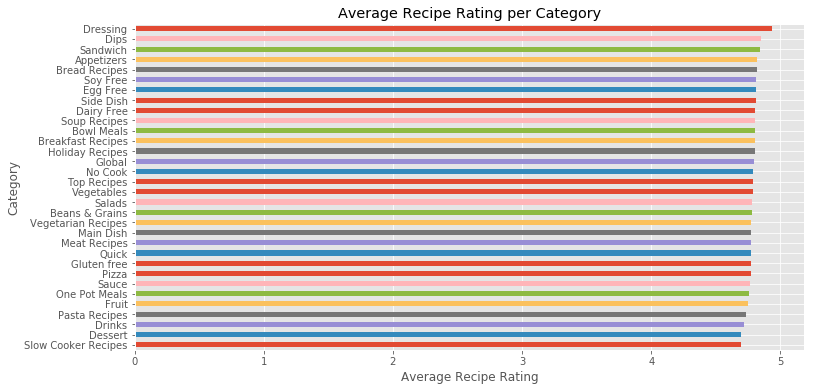

In [37]:
from plotly.graph_objs import Bar
from plotly.graph_objs import Figure, Histogram, Layout


df_rating = df.copy()

df_rating = df_rating.groupby('category')['rating'].mean().sort_values().plot(kind='barh', figsize=(12,6))
#df_rating

plt.xlabel('Average Recipe Rating')
plt.ylabel('Category')
plt.title('Average Recipe Rating per Category', )

Text(0.5, 1.0, 'Average Serving Price per Category')

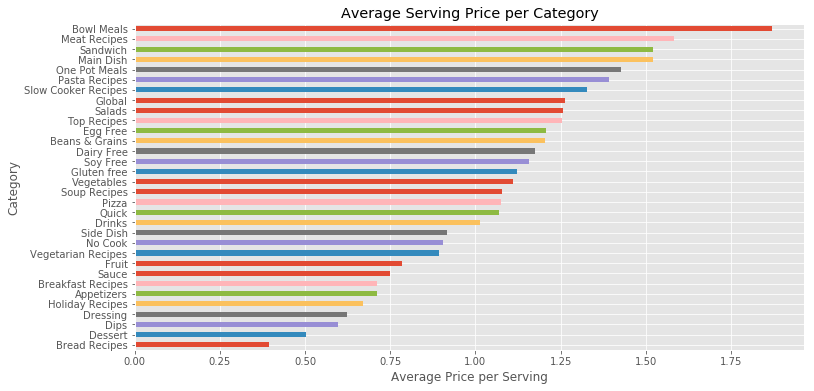

In [39]:
df_price = df.copy()
df_price = df_price.groupby('category')['serving_price'].mean().sort_values().plot(kind = 'barh', figsize=(12,6))
plt.xlabel('Average Price per Serving')
plt.ylabel('Category')
plt.title('Average Serving Price per Category')

Text(0.5, 1.0, 'Total Number of Votes per Category')

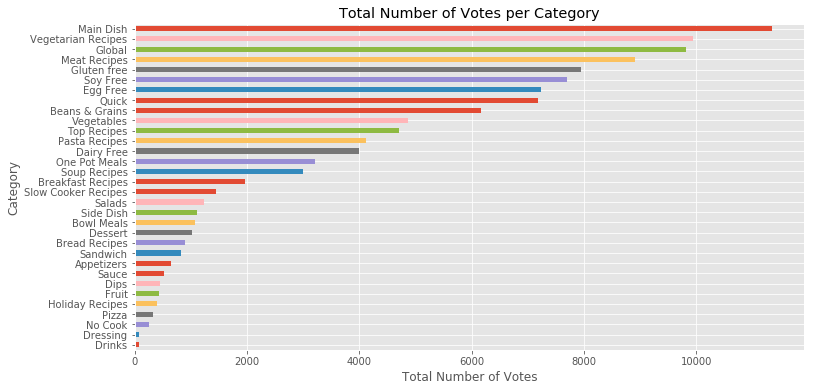

In [40]:
df_votes = df.copy()
df_votes.groupby('category')['votes'].sum().sort_values().plot(kind = 'barh', figsize = (12,6))

plt.xlabel('Total Number of Votes')
plt.ylabel('Category')
plt.title('Total Number of Votes per Category')

In [34]:
group = df_votes.groupby('category')
colFun = {'recipe_name':['count'], 'votes':['sum']}
votes_analysis = group.agg(colFun)
votes_analysis.columns = ['recipe_count','total_votes']
votes_analysis['ratio'] = votes_analysis['total_votes']/votes_analysis['recipe_count']
votes_analysis = votes_analysis.sort_values(by = 'ratio').reset_index()
votes_analysis

,category,recipe_count,total_votes,ratio
0,Drinks,10,70,7.000000
1,Dressing,12,87,7.250000
2,Fruit,48,441,9.187500
3,Pizza,33,329,9.969697
4,No Cook,25,252,10.080000
5,Holiday Recipes,39,399,10.230769
6,Dessert,82,1031,12.573171
7,Dips,35,457,13.057143
8,Side Dish,79,1111,14.063291
9,Bread Recipes,63,893,14.174603


Text(0.5, 1.0, 'Ratio of Total Votes to Total Recipes per Category')

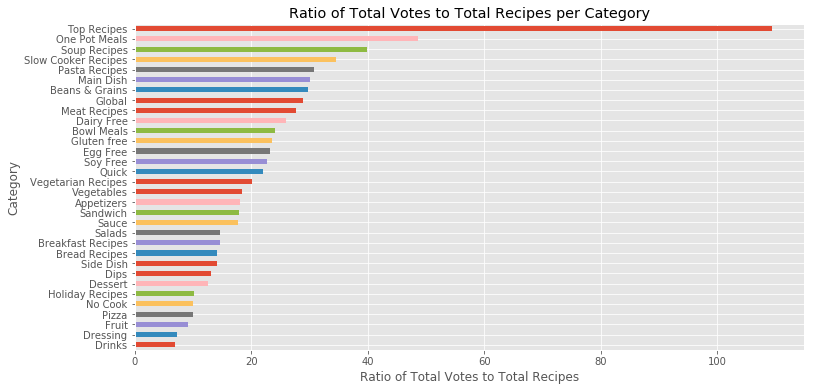

In [41]:
votes_analysis.plot(x = 'category', y = 'ratio', kind = 'barh', figsize = (12,6), legend = False)
plt.xlabel('Ratio of Total Votes to Total Recipes')
plt.ylabel('Category')
plt.title('Ratio of Total Votes to Total Recipes per Category')

In [14]:
# remove duplicates
df_nodupes = df.copy()
df_nodupes = df_nodupes.loc[:, df_nodupes.columns != 'category']
df_nodupes = df_nodupes.drop_duplicates()


Text(0.5, 1.0, 'Price per Serving vs. Rating')

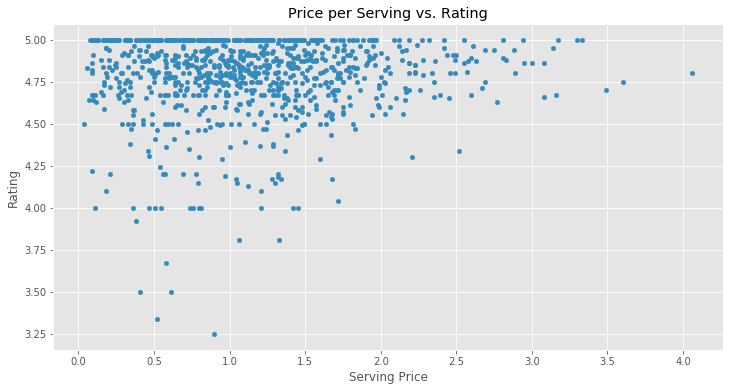

In [42]:
#$ vs rating

df_nodupes.plot(x = 'serving_price', y = 'rating', kind = 'scatter', figsize = (12,6))
plt.xlabel('Serving Price')
plt.ylabel('Rating')
plt.title('Price per Serving vs. Rating')

Text(0.5, 1.0, 'Total Recipe Time vs. Rating')

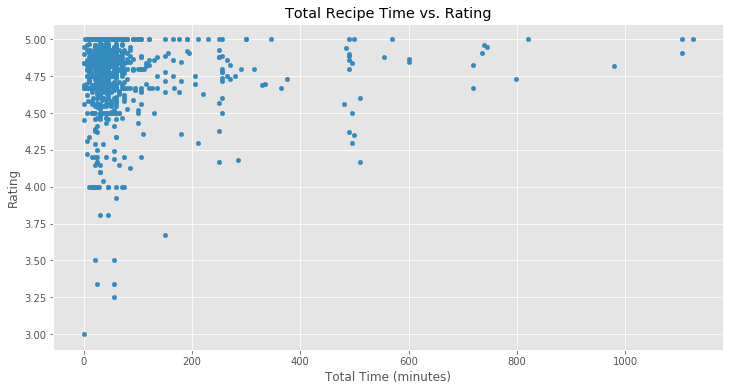

In [62]:
#time vs rating
df_nodupes['total_time'] = (df_nodupes['time_hrs']*60)+df_nodupes['time_mins']

df_nodupes.plot(x = 'total_time', y = 'rating', kind = 'scatter', figsize = (12,6))
plt.xlabel('Total Time (minutes)')
plt.ylabel('Rating')
plt.title('Total Recipe Time vs. Rating')

(0, 120)

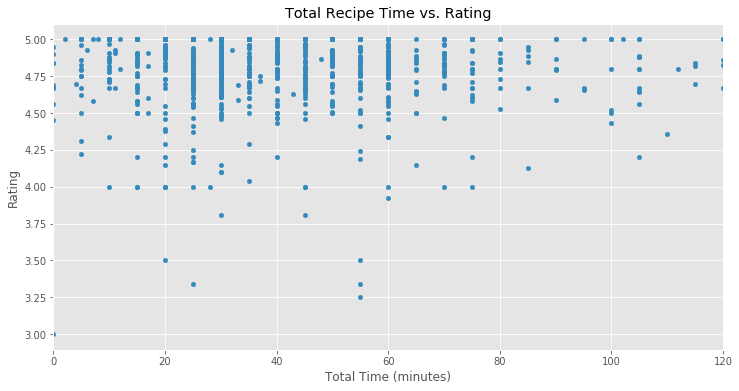

In [63]:
df_nodupes.plot(x = 'total_time', y = 'rating', kind = 'scatter', figsize = (12,6))
plt.xlabel('Total Time (minutes)')
plt.ylabel('Rating')
plt.title('Total Recipe Time vs. Rating')
plt.xlim((0,120))

In [65]:
overalls = {'Characteristics':['Average Rating', 'Average Total Time', 
                               'Median Total Time', 'Average Price per Serving'],
            'Values':[df_nodupes['rating'].mean(), df_nodupes['total_time'].mean(),
                      df_nodupes['total_time'].median(), df_nodupes['serving_price'].mean()]}
    
overalls_df = pd.DataFrame(overalls)
overalls_df = overalls_df.set_index('Characteristics')
overalls_df

,Values
Characteristics,
Average Rating,4.777889
Average Total Time,72.087500
Median Total Time,40.000000
Average Price per Serving,1.128525


In [ ]:
#add axis labels and plot titles
#prices of hello fresh and blue apron
    #blue apron regular = $7.50 per serving for 4 serving meals, 4 times a week (free shipping or $7.99 shipping)
    #blue apron vegetarian= $9.99 per serving for 2 serving meals, 3 times a week (free shipping or #7.99 shipping)
    #hello fresh regular = $7.50 per serving for 4 serving meals, 3 times a week ($6.99 shipping)
    #hello fresh veggie = $6.99per serving for 4 serving meals, 3 times a week ($6.99 shipping)
#overall average rating, time, and recipe price